# Unsupervised Learning

By: Oscar Ko

This notebook was created for data analysis and unsupervised machine learning on this dataset from Stanford:

https://data.stanford.edu/hcmst2017

---
---

# Step 1: Imports and Data

Note: Train-Test split will not be done for unsupervised learning because this is for exploration and not testing models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/df_renamed.csv")

print(df.shape, "\n")

df.info(verbose=True)

(2844, 75) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2844 non-null   int64  
 1   ID                                2844 non-null   int64  
 2   ageGap                            2844 non-null   float64
 3   attendReligiousServiceFreq        2844 non-null   object 
 4   employmentStatus                  2844 non-null   object 
 5   genderSubjectAttractedTo          2837 non-null   object 
 6   houseType                         2844 non-null   object 
 7   householdAdults_num               2844 non-null   int64  
 8   householdIncome                   2844 non-null   int64  
 9   householdMinor_num                2844 non-null   int64  
 10  householdSize                     2844 non-null   int64  
 11  interracial                       2822 non-null   object

First drop the other two outcome labels, leaving just "relationshipQuality_isGood"

In [2]:
# Remove "relationshipQuality" and "relationshipQuality_num"

df = df.drop(["relationshipQuality", "relationshipQuality_num"], axis=1)

success1 = "relationshipQuality_num" not in df.columns
success2 = "relationshipQuality" not in df.columns

print("Sucessfully removed both columns?", success1 & success2)

Sucessfully removed both columns? True


### Remove unneeded columns

Columns related to couples first moving in together have over 300 missing values. This is due to not all couples moving in together. Since 300 is a large chunk of our 2275 records, I will remove these columns.

In [3]:
columns_to_remove = [
    "moveIn_YearFraction",
    "shipStart_to_moveIn_YearFraction",
    "Unnamed: 0", # Also Remove column with no useful info
    "ID" # Also Remove column with no useful info
]

df.drop(columns_to_remove, axis=1, inplace=True)


Since 183 records is not too much compared to the 2275 in total, I will op to remove these missing values.

In [4]:
# Dropping NA values


cols_with_na = df.columns[df.isna().any()].tolist()

for col in cols_with_na:

    indexes = df[col].notna()
    df = df[indexes]

# filter odd partner age cases
age_filter = df["partnerAge"] > 5
df = df[age_filter]



# Check number of rows with missing values
print("Cases with missing values:", df.isna().any(axis=1).sum())

Cases with missing values: 0


In [5]:
print(df.shape)

(2608, 69)


---
---

# Step 2: Prepare the Data for Machine Learning

### One-Hot Encode Categorical Features

In [6]:
# First get the numeric columns and the categorical columns

numeric_features = df._get_numeric_data().columns

categorical_features = list(set(df.columns) - set(numeric_features))

print(len(df.columns), len(numeric_features), len(categorical_features))

print(df.shape)

69 22 47
(2608, 69)


In [7]:
# One hot encode categorical features 

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print(df.shape)

(2608, 110)


### Feature Scaling on Numeric Columns with Standardization

In [8]:
# import scaling & column transformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a function to scale df

def scaleCategoricalFeatures(X_data):
    
    scaler = StandardScaler()

    X_data[numeric_features] = scaler.fit_transform(X_data[numeric_features])
    
    return X_data

df = scaleCategoricalFeatures(df)

print(df.shape)

(2608, 110)


### Make sure it worked by seeing if Standard Deviations of Numeric Columns are 1

In [23]:
df.describe()

,ageGap,householdAdults_num,householdIncome,householdMinor_num,householdSize,isHispanic,met_YearFraction,met_to_shipStart_diff,numRelativesSeePerMonth,partnerAge,...,whoEarnedMore_We earned about the same amount,whoEarnedMore_[Partner Name] earned more,whoEarnedMore_[Partner Name] was not working for pay,subjectSexualIdentity_Something else,subjectSexualIdentity_bisexual,subjectSexualIdentity_gay,subjectSexualIdentity_heterosexual or straight,subjectSexualIdentity_lesbian,metIn_privateParty_yes,metOnline_datingSiteOrApp_yes
count,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,2.608000e+03,...,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.00000,2608.000000,2608.000000
mean,-1.911389e-17,5.295270e-16,4.729516e-17,2.354116e-16,9.970722e-16,-4.572007e-16,-1.432647e-15,-6.055568e-17,-2.062086e-16,-1.873076e-16,...,0.119632,0.413727,0.060199,0.006135,0.082439,0.045629,0.839340,0.02569,0.100077,0.059816
std,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,...,0.324593,0.492595,0.237901,0.078100,0.275085,0.208719,0.367287,0.15824,0.300160,0.237191
min,-8.606632e-01,-1.377801e+00,-1.354838e+00,-5.494640e-01,-1.263476e+00,-3.632416e-01,-3.276599e+00,-3.668050e-01,-6.828172e-01,-2.427833e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-6.529444e-01,-2.279434e-01,-7.208737e-01,-5.494640e-01,-5.395865e-01,-3.632416e-01,-7.646044e-01,-3.668050e-01,-6.828172e-01,-8.752847e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,-2.375067e-01,-2.279434e-01,-1.987858e-01,-5.494640e-01,-5.395865e-01,-3.632416e-01,1.965890e-01,-3.284706e-01,-2.901409e-01,5.624415e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,1.779309e-01,-2.279434e-01,6.589301e-01,4.547421e-01,9.081929e-01,-3.632416e-01,8.555581e-01,-1.177716e-01,2.988737e-01,8.014672e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,8.486684e+00,7.821058e+00,3.082910e+00,7.484184e+00,5.251531e+00,2.752989e+00,1.380740e+00,1.221991e+01,9.134092e+00,2.850831e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# alphbetize column names

df = df.sort_index(axis=1)

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 2843
Data columns (total 110 columns):
 #    Column                                                                                        Dtype  
---   ------                                                                                        -----  
 0    ageGap                                                                                        float64
 1    attendReligiousServiceFreq_More than once a week                                              uint8  
 2    attendReligiousServiceFreq_Never                                                              uint8  
 3    attendReligiousServiceFreq_Once a week                                                        uint8  
 4    attendReligiousServiceFreq_Once a year or less                                                uint8  
 5    attendReligiousServiceFreq_Once or twice a month                                              uint8  
 6    attendReligiousService

---
---

# Step 3: Unsupervised Learning (ALL TOP FEATURES)

### Principal Component Analysis

#### Capture 95% of variance 

In [65]:
from sklearn.decomposition import PCA

classification_top_features = [
    "householdIncome",
    "isLivingTogether_Yes",
    "metAs_coworkers_yes",
    "partnerAge",
    "partnerMotherEduc_years",
    "sexFrequency_3 to 6 times a week",
    "sexFrequency_Once a month or less",
    "sexFrequency_Once or twice a week",
    "relationshipQuality_isGood"
]

regression_top_features = [    
    "householdIncome",
    "householdMinor_num",
    "isLivingTogether_Yes",
    "metAs_workNeighbors_yes",
    "metIn_school_yes",
    "partnerRace_Asian or Pacific Islander",
    "partnerRace_White",
    "sexFrequency_3 to 6 times a week",
    "sexFrequency_Once a month or less",
    "sexFrequency_Once or twice a week",
    "whoEarnedMore_We earned about the same amount",
    "relationshipQuality_isGood"
]

all_top_features = list(set(classification_top_features +
                           regression_top_features))

df_less = df.copy()[all_top_features]

# create instance of PCA with enough features to capture 95% of the variance
pca = PCA(n_components=0.95,
         random_state=42)

# fit PCA model to the scaled data
pca.fit(df_less)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.23440349 0.19782562 0.14989051 0.13982548 0.09525711 0.04242338
 0.02606393 0.02543566 0.02311939 0.01750887]


#### How many features to retain 95% variance?

Text(0, 0.5, 'Principal components')

<Figure size 1600x640 with 0 Axes>

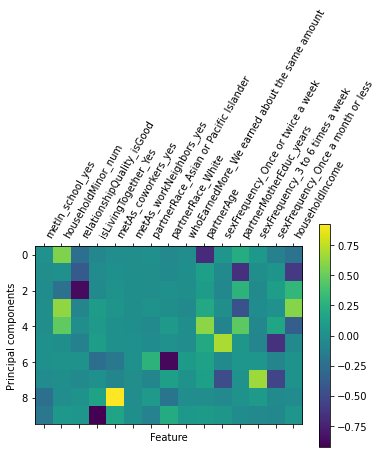

In [66]:
plt.figure(figsize=(20, 8), dpi=80)

plt.matshow(pca.components_, cmap='viridis')

plt.colorbar()

plt.xticks(range(len(df_less.columns)),
           df_less.columns, rotation=60, ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal components")

### K-Means Clustering: Elbow Method

In [67]:
df_less_pca = pca.transform(df_less)

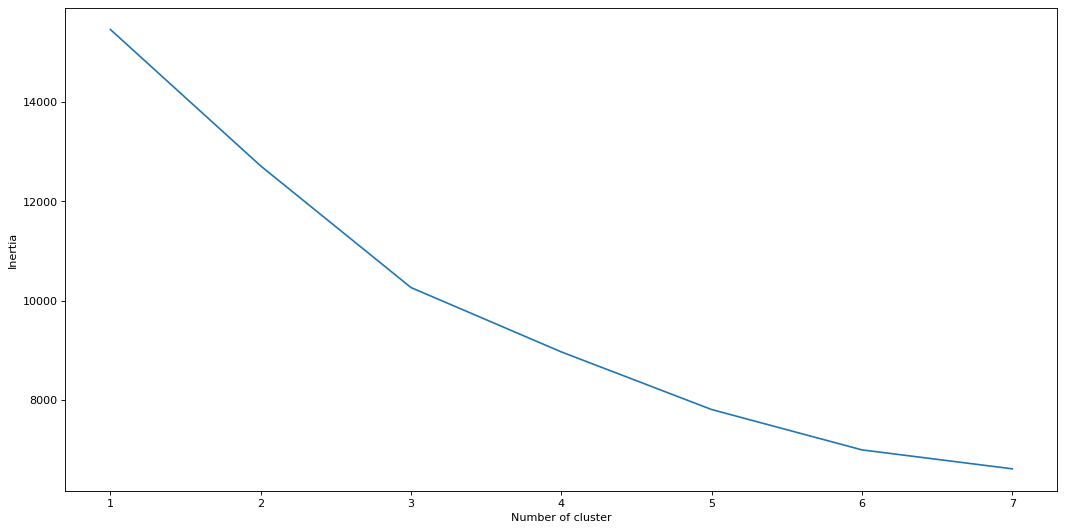

In [68]:
from sklearn.cluster import KMeans

inertiaVals = {}

for k in range(1, 8):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(df_less_pca)
    inertiaVals[k] = kmeansTmp.inertia_ 
    
plt.figure(figsize=(16, 8), dpi=80)

plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))

plt.xlabel("Number of cluster")
plt.ylabel("Inertia")

plt.show()

Without PCA

It seems the optimal number of clusters might be K = 2.

The curve goes from steep to shallow at K = 2, and afterwards, it smooths out.

---

With PCA

K = 4

### K-Means Clustering 

When I created a correlation matrix in Project 1, Glucose (r = 0.48) and BMI (r = 0.28) had the highest correlations with the diabetes outcome.

For visualizing K-Means without PCA, I will use Glucose and BMI.

Text(0, 0.5, 'Component 1')

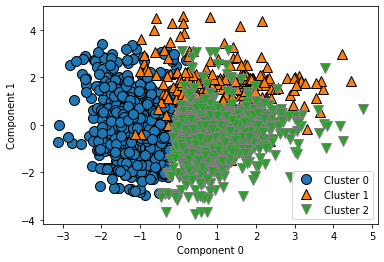

In [79]:
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3,
               random_state=42)

kmeans.fit(df_less_pca)

assignments=kmeans.labels_


# Select X and Y Axis

X = "Component 0"
y = "Component 1"

mglearn.discrete_scatter(
    df_less_pca[:,0],
    df_less_pca[:,1], 
    assignments
)



plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], loc="best")

plt.xlabel(X)
plt.ylabel(y)

PC0 - children up, Parter age down, (rQual slight down, partnerMother Educ slight up)

(less children, older partners (slight happier, slightly more educated) --- more children, younger partners, (slightly sadder, slightly less educ))

---

PC1 - HH income down, partner mother educ down (rQual slight down, partner age slight up)

(Wealthier, more educated (slightly happier, slightly younger) -- poorer, less educated (slightly sadder, slightly older))

---

- Blue circles: Less/no children, older partners, slightly happier, slightly more educated

(Older educated and childless - Happy)

- Orange triangles: More children, neutral age partners, sadder, less educated, poorer

(Neural aged with more children, less education, less income - Sad)

- Green triangles: More children, young-young partners, netural rQual, some education, wealthier

(Younger couples with more children, some education, more income - Okay)